In [38]:
import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import glob, os

%matplotlib inline

In [32]:
def load_audio_file(file_path, fs, duration):
    duration_in_samples = fs * duration
    _, data = wavfile.read(file_path) #, sr=16000
    if len(data) > duration_in_samples:
        data = data[:duration_in_samples]
    else:
        data = np.pad(data, (0, max(0, duration_in_samples - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

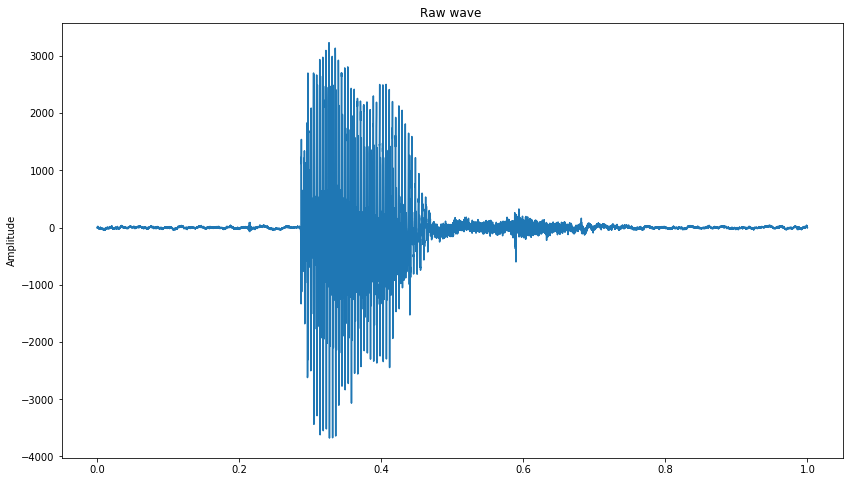

In [60]:
fs = 16000
data = load_audio_file("../input/train/audio/off/1df483c0_nohash_0.wav", fs, 1)
plot_time_series(data)
ipd.Audio(data, rate=fs)

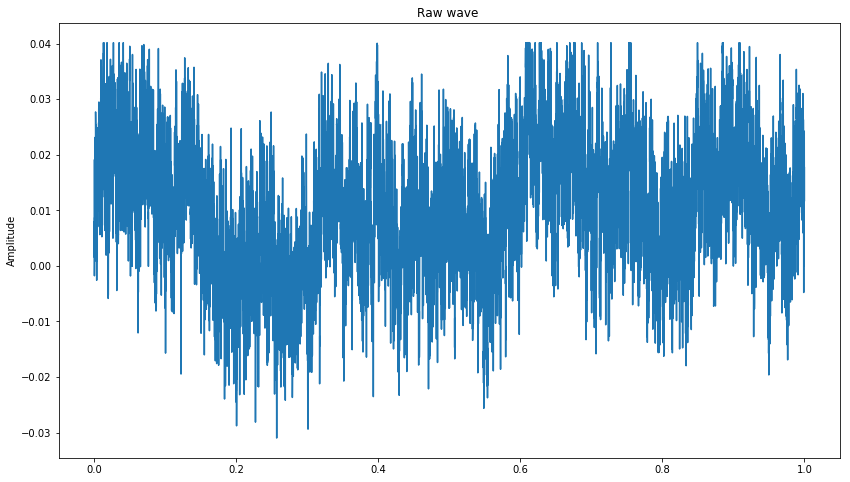

In [61]:
silences_path = glob.glob(os.path.join('..', 'input', 'train', 'audio', 'silence', '*wav'))
silences_path = np.random.choice(silences_path, 5)
silence1 = load_audio_file(silences_path[0], fs, 1)
plot_time_series(silence1)
ipd.Audio(silence1, rate=fs)

In [20]:
ipd.Audio(data, rate=fs)

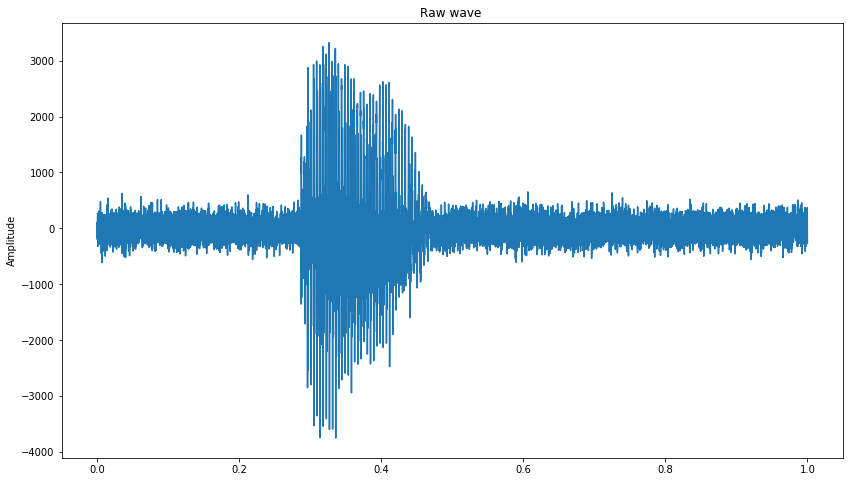

In [36]:
wn = np.random.randn(len(data))
data_wn = data + np.max(data)*wn*0.05
plot_time_series(data_wn)
ipd.Audio(data_wn, rate=fs)

In [ ]:
data = load_audio_file("../input/train/audio/off/1df483c0_nohash_0.wav", fs, 1)

plot_time_series(data_wn)
ipd.Audio(data_wn, rate=fs)